In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
#load data
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
print('The shape of training dataset : ', train_df.shape)
print('The shape of testing dataset : ', test_df.shape)

The shape of training dataset :  (42000, 785)
The shape of testing dataset :  (28000, 784)


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

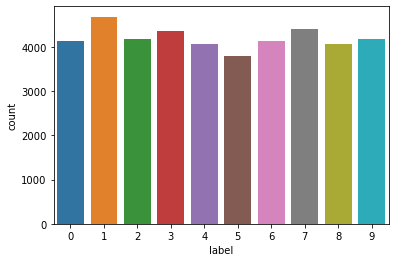

In [3]:
Y_train = train_df["label"]
X_train = train_df.drop(labels = ["label"],axis = 1) 

count = sns.countplot(Y_train)

Y_train.value_counts()

In [5]:
#The data right now is in an int8 format, so before you feed it into the network you need to convert its type to float32
#you also have to rescale the pixel values in range 0 - 1 inclusive

X_train = X_train.astype('float32')
test = test_df.astype('float32')
X_train = X_train / 255.
test = test / 255.


In [8]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

X_train.shape, test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [9]:
# Change the labels from categorical to one-hot encoding
Y_train_one_hot = to_categorical(Y_train)

# Display the change for category label using one-hot encoding
print('Original label:', Y_train[0])
print('After conversion to one-hot:', Y_train_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(X_train, Y_train_one_hot, test_size=0.2, random_state=21)

In [11]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [12]:
batch_size = 128
epochs = 20
num_classes = 10

In [13]:
#Neural network architecture

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [16]:
train_model = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 6s 185us/step - loss: 0.5045 - accuracy: 0.8334 - val_loss: 0.0913 - val_accuracy: 0.9740
Epoch 2/20
33600/33600 [==============================] - 2s 65us/step - loss: 0.1325 - accuracy: 0.9581 - val_loss: 0.0635 - val_accuracy: 0.9810
Epoch 3/20
33600/33600 [==============================] - 2s 67us/step - loss: 0.0981 - accuracy: 0.9694 - val_loss: 0.0457 - val_accuracy: 0.9876
Epoch 4/20
33600/33600 [==============================] - 2s 67us/step - loss: 0.0792 - accuracy: 0.9759 - val_loss: 0.0411 - val_accuracy: 0.9882
Epoch 5/20
33600/33600 [==============================] - 3s 78us/step - loss: 0.0688 - accuracy: 0.9785 - val_loss: 0.0423 - val_accuracy: 0.9883
Epoch 6/20
33600/33600 [==============================] - 2s 67us/step - loss: 0.0619 - accuracy: 0.9807 - val_loss: 0.0332 - val_accuracy: 0.9917
Epoch 7/20
33600/33600 [==============================] - 2s 73us/st

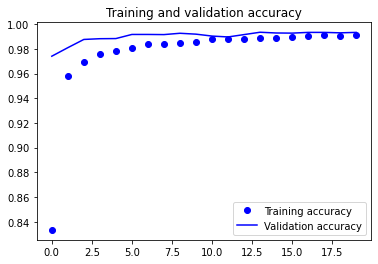

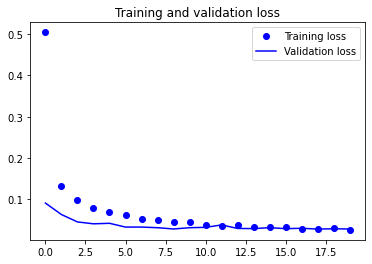

In [17]:
#plotting the accuracy and loss plots between training and validation data for the one last time

accuracy = train_model.history['accuracy']
val_accuracy = train_model.history['val_accuracy']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
test_eval = model.evaluate(valid_X, valid_label, verbose=1)


8400/8400 [==============================] - 1s 75us/step


In [19]:
print('Validation Test loss:', test_eval[0])
print('Validation Test accuracy:', test_eval[1])

Validation Test loss: 0.02857481961317327
Validation Test accuracy: 0.9933333396911621


In [21]:
# predict results
predict_classes = model.predict(test)

# # select the indix with the maximum probability
predict_classes = np.argmax(np.round(predict_classes),axis=1)

results = pd.Series(predict_classes,name="Label")


array([2, 0, 9, ..., 3, 9, 2])

In [23]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)